In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Observations

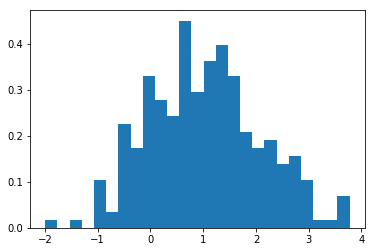

In [2]:
num_observations = 250
theta_true = 1.


N = torch.distributions.normal.Normal(theta_true, 1.)
observations = N.sample(torch.Size([num_observations]))

plt.hist(observations.view(-1).numpy(), bins=25, density=True)
plt.show()

# Inference

In [3]:
def log_likelihood(theta, observations):
    N = torch.distributions.normal.Normal(theta, 1.)
    likelihood = N.log_prob(observations).sum()
        
    return likelihood

In [4]:
from hypothesis.transition import UniformTransitionDistribution

min = torch.tensor(-5)
max = torch.tensor(8)
transition = UniformTransitionDistribution(min, max)

In [5]:
from hypothesis.inference import MetropolisHastings
from hypothesis.inference import HamiltonianMonteCarlo

sampler_mhmc = MetropolisHastings(log_likelihood, transition)
sampler_hmc = HamiltonianMonteCarlo(log_likelihood, 20, 0.03)

In [6]:
theta_0 = torch.tensor(5).float()

result_mhmc = sampler_mhmc.infer(
    observations,
    theta_0=theta_0,
    samples=20000,
    burnin_steps=10000)

result_hmc = sampler_hmc.infer(
    observations,
    theta_0=theta_0,
    samples=20000,
    burnin_steps=10000)

# Plots for Metropolis Hastings

In [7]:
from hypothesis.visualization.mcmc import plot_trace
from hypothesis.visualization.mcmc import plot_autocorrelation

figure_height = 20
figure_width = 20

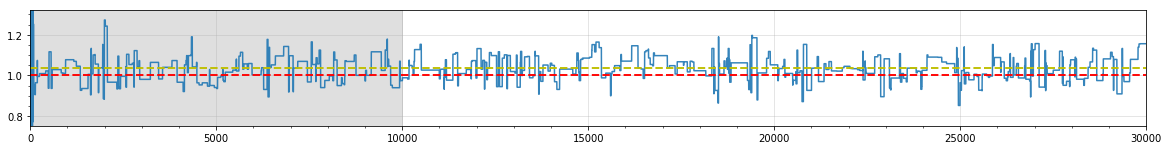

In [8]:
fig, axes = plot_trace(result_mhmc, truth=theta_true, aspect=1, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

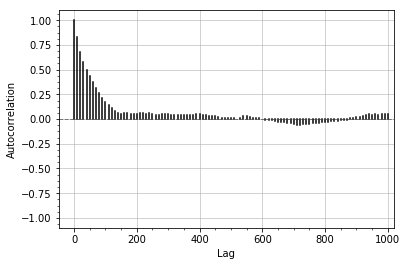

In [9]:
plot_autocorrelation(result_mhmc, max_lag=1000, interval=10)
plt.show()

# Plots for Hamiltonian MC

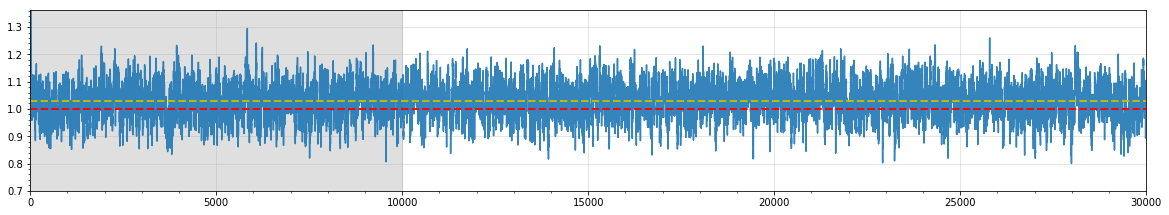

In [10]:
fig, axes = plot_trace(result_hmc, truth=theta_true, aspect=1, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

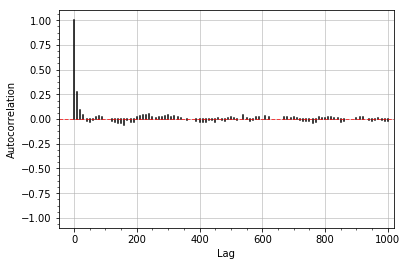

In [11]:
plot_autocorrelation(result_hmc, max_lag=1000, interval=10)
plt.show()

# Efficiency Comparison

In [12]:
effective_size_mhmc = result_mhmc.effective_size()
efficiency_mhmc = effective_size_mhmc / result_mhmc.size()

effective_size_hmc = result_hmc.effective_size()
efficiency_hmc = effective_size_hmc / result_hmc.size()

In [13]:
efficiency_mhmc

0.0071

In [14]:
efficiency_hmc

0.0554

In [15]:
mhmc_chain = [x.item() for x in result_mhmc.chain()]
mhmc_mean = sum(mhmc_chain) / float(len(mhmc_chain))
mhmc_mean

1.0371242787837982

In [16]:
hmc_chain = [x.item() for x in result_hmc.chain()]
hmc_mean = sum(hmc_chain) / float(len(hmc_chain))
hmc_mean

1.0308342381238937